In [139]:
import numpy as np
import pandas as pd

In [140]:
data=pd.read_csv("uber.csv")

In [141]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [142]:
def Distance(lat1, lon1, lat2, lon2):
    R = 6371 
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

data['distance_km'] = data.apply(lambda row: Distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


data = data.drop(['key', 'pickup_datetime'], axis=1)

data = data.dropna()

data

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


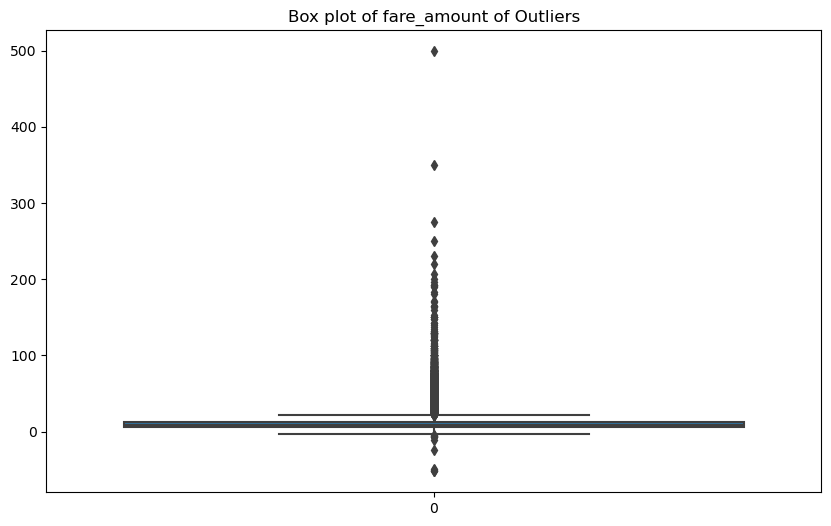

Original data shape: (199999, 8)
Data shape after removing outliers with IQR: (149726, 8)


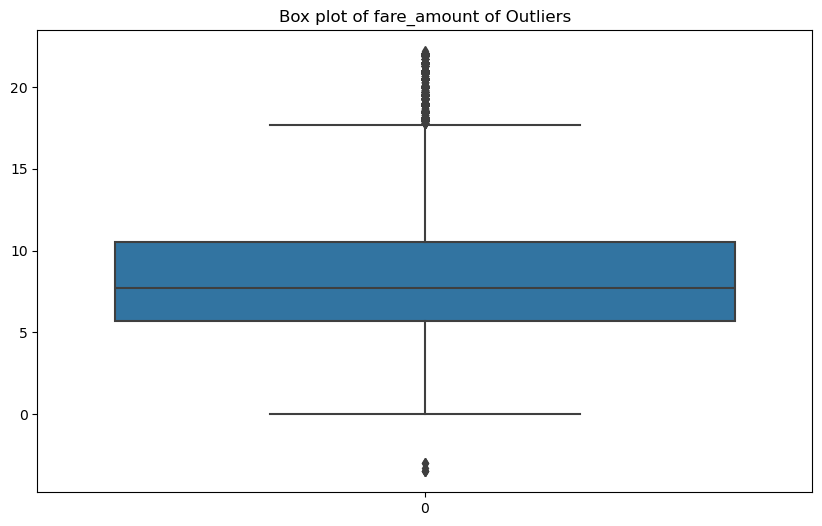

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data['fare_amount'])
plt.title('Box plot of fare_amount of Outliers')
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers with IQR: {data_cleaned.shape}")


plt.figure(figsize=(10,6))
sns.boxplot(data_cleaned['fare_amount'])
plt.title('Box plot of fare_amount of Outliers')
plt.show()


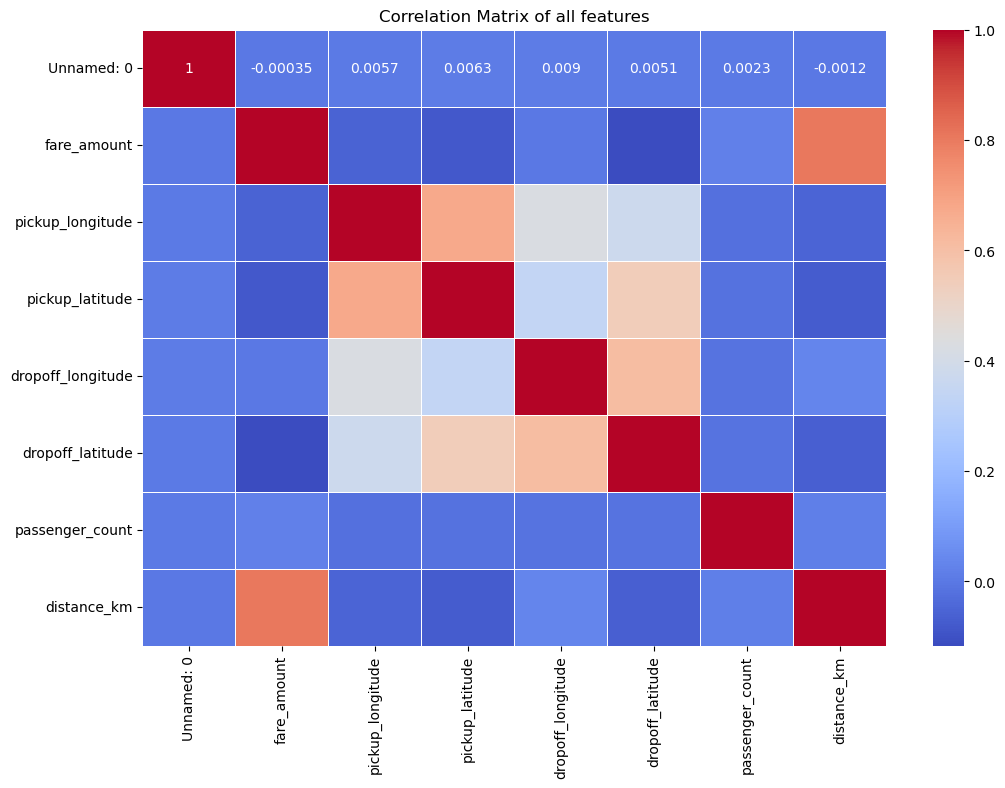

In [144]:

corr_matrix = data_cleaned.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of all features')
plt.show()


In [145]:
data_cleaned

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
5,44470845,4.9,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
...,...,...,...,...,...,...,...,...
199994,3189201,12.0,-73.983070,40.760770,-73.972972,40.754177,1,1.122878
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 


X = data_cleaned.drop(['fare_amount','passenger_count','Unnamed: 0'],axis=1)
y = data_cleaned['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)


ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)


lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)


In [147]:

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

r2_lr, rmse_lr, mae_lr = evaluate_model(y_test, y_pred_lr)
print(f'Linear Regression - R2: {r2_lr}, RMSE: {rmse_lr}, MAE: {mae_lr}')

r2_ridge, rmse_ridge, mae_ridge = evaluate_model(y_test, y_pred_ridge)
print(f'Ridge Regression - R2: {r2_ridge}, RMSE: {rmse_ridge}, MAE: {mae_ridge}')

r2_lasso, rmse_lasso, mae_lasso = evaluate_model(y_test, y_pred_lasso)
print(f'Lasso Regression - R2: {r2_lasso}, RMSE: {rmse_lasso}, MAE: {mae_lasso}')


Linear Regression - R2: 0.6492324962485885, RMSE: 2.283882799326621, MAE: 1.6399925653293193
Ridge Regression - R2: 0.6492338209330886, RMSE: 2.28387848674497, MAE: 1.639953197151407
Lasso Regression - R2: 0.6490539557274249, RMSE: 2.284463973104086, MAE: 1.6403869701579639


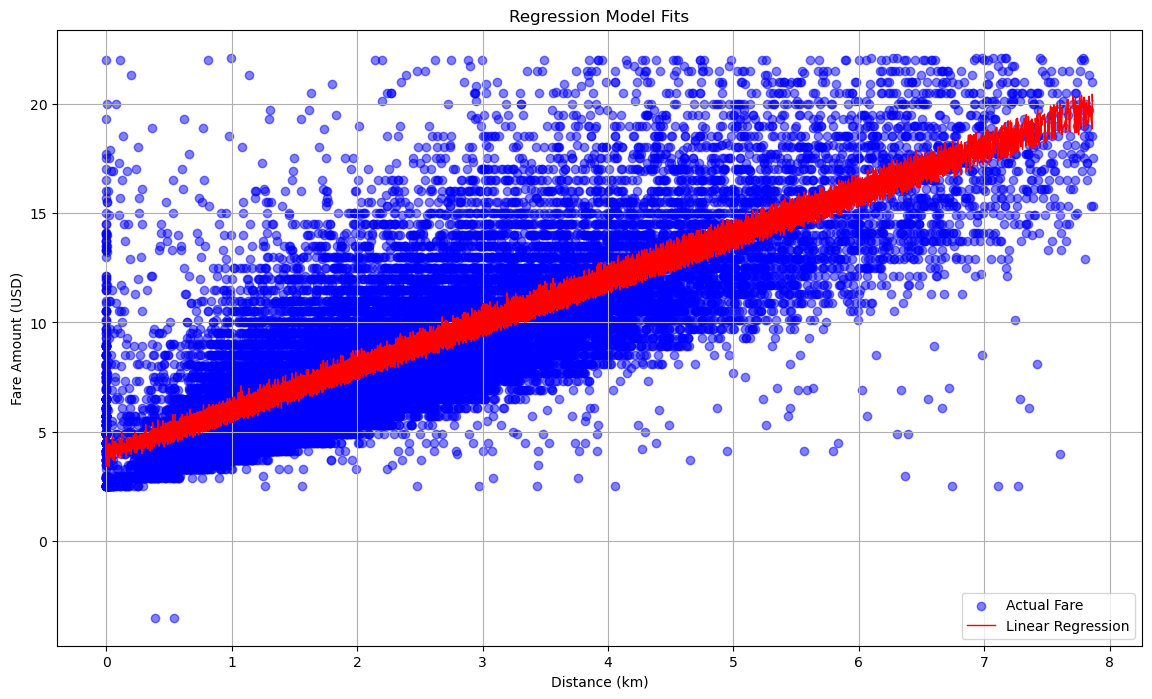

In [148]:

plt.figure(figsize=(14, 8))
plt.scatter(X_test['distance_km'], y_test, color='blue', label='Actual Fare', alpha=0.5)


y_pred_lr = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)


sorted_index = X_test['distance_km'].argsort()
X_test_sorted = X_test['distance_km'].iloc[sorted_index]

plt.plot(X_test_sorted, y_pred_lr[sorted_index], color='red', label='Linear Regression', linewidth=1)
# plt.plot(X_test_sorted, y_pred_ridge[sorted_index], color='green', label='Ridge Regression', linewidth=.35)
# plt.plot(X_test_sorted, y_pred_lasso[sorted_index], color='orange', label='Lasso Regression', linewidth=.15)
# plt.plot(X_test_sorted, y_pred_lr[sorted_index], color='red', label='Linear Regression', linewidth=1)


plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount (USD)')
plt.title('Regression Model Fits')
plt.legend()
plt.grid(True)
plt.show()


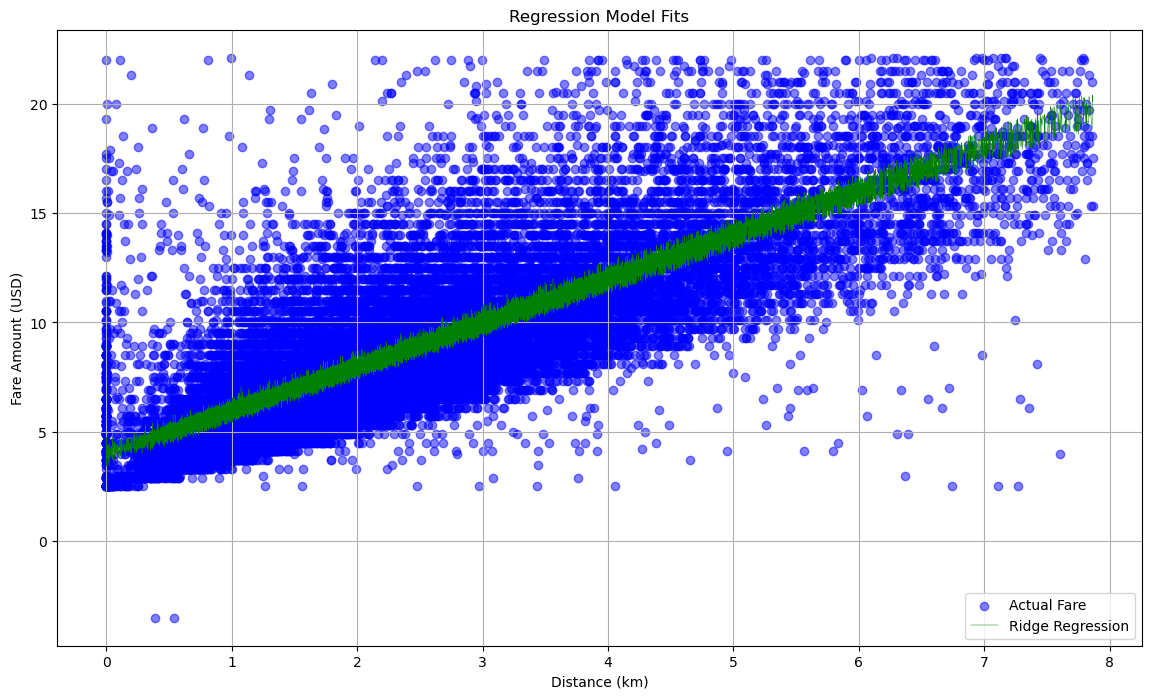

In [149]:

plt.figure(figsize=(14, 8))
plt.scatter(X_test['distance_km'], y_test, color='blue', label='Actual Fare', alpha=0.5)


y_pred_lr = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)


sorted_index = X_test['distance_km'].argsort()
X_test_sorted = X_test['distance_km'].iloc[sorted_index]

# plt.plot(X_test_sorted, y_pred_lr[sorted_index], color='red', label='Linear Regression', linewidth=1)
plt.plot(X_test_sorted, y_pred_ridge[sorted_index], color='green', label='Ridge Regression', linewidth=.35)


plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount (USD)')
plt.title('Regression Model Fits')
plt.legend()
plt.grid(True)
plt.show()


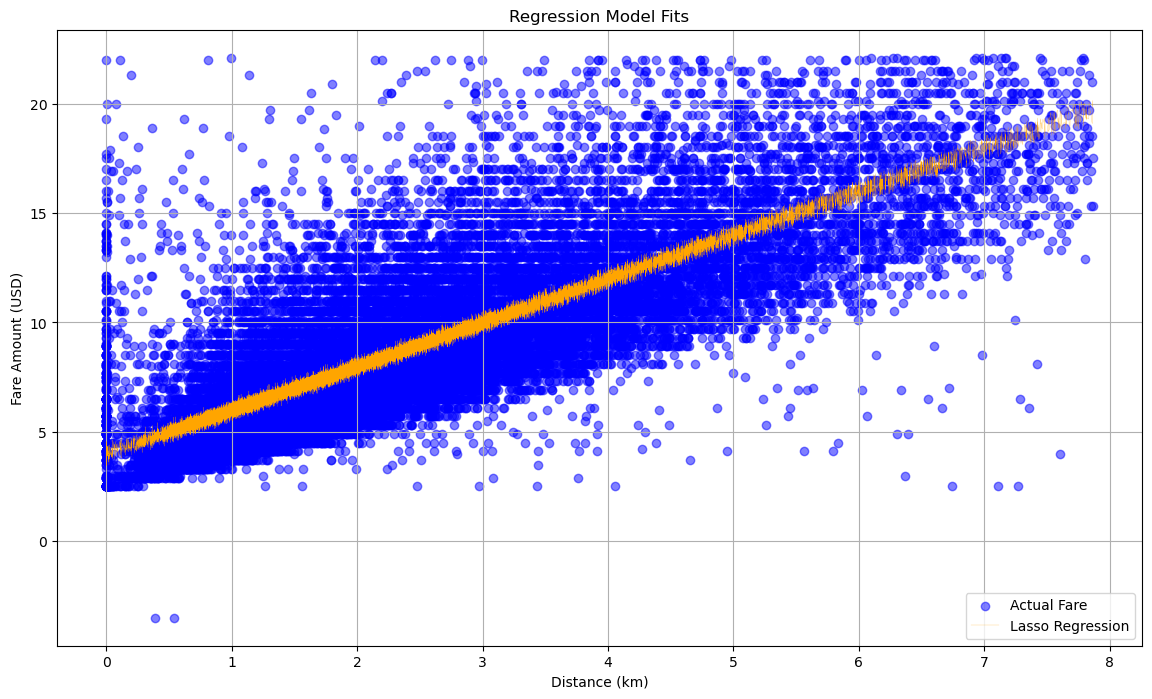

In [150]:

plt.figure(figsize=(14, 8))
plt.scatter(X_test['distance_km'], y_test, color='blue', label='Actual Fare', alpha=0.5)


y_pred_lr = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)


sorted_index = X_test['distance_km'].argsort()
X_test_sorted = X_test['distance_km'].iloc[sorted_index]

plt.plot(X_test_sorted, y_pred_lasso[sorted_index], color='orange', label='Lasso Regression', linewidth=.15)
# plt.plot(X_test_sorted, y_pred_lr[sorted_index], color='red', label='Linear Regression', linewidth=1)


plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount (USD)')
plt.title('Regression Model Fits')
plt.legend()
plt.grid(True)
plt.show()
